In [ ]:
import pandas as pd
df = pd.read_csv('/content/2025-09-01T04-03-42.625Z-2025-07-04T13-24-57.561Z-diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Let's check for missing values and visualize them.

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

# Check for missing values
print(df.isnull().sum())



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### Data Splitting and Feature Scaling
First, we'll split the data into training and testing sets to prepare it for model training. We'll also apply feature scaling to ensure that all features contribute equally to the model, which is important for distance-based algorithms like KNN and Logistic Regression.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data splitting and feature scaling complete.")

Data splitting and feature scaling complete.


### Logistic Regression Model
Now, let's train a Logistic Regression model and evaluate its performance.

Confusion Matrix (Logistic Regression):
 [[106  19]
 [ 32  35]]
Precision (Logistic Regression): 0.6481481481481481
Recall (Logistic Regression): 0.5223880597014925
F1-score (Logistic Regression): 0.5785123966942148
ROC AUC (Logistic Regression): 0.832


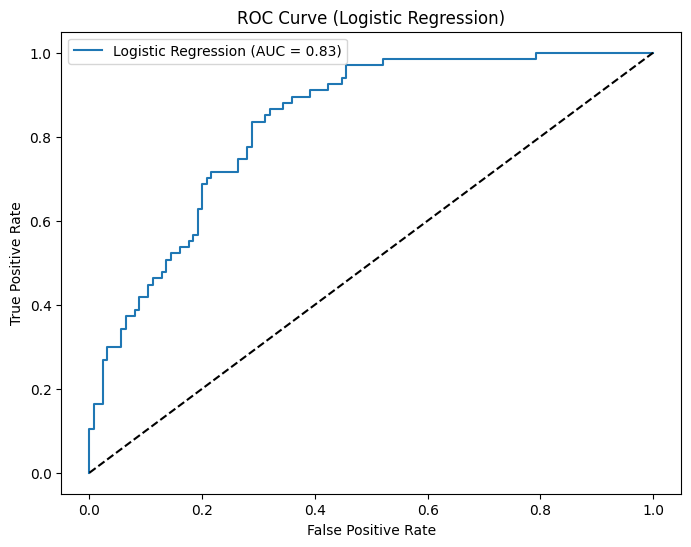

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

y_pred_logreg = logreg.predict(X_test_scaled)

conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1])

print("Confusion Matrix (Logistic Regression):\n", conf_matrix_logreg)
print("Precision (Logistic Regression):", precision_logreg)
print("Recall (Logistic Regression):", recall_logreg)
print("F1-score (Logistic Regression):", f1_logreg)
print("ROC AUC (Logistic Regression):", roc_auc_logreg)

fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, logreg.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression)')
plt.legend()
plt.show()

### K-Nearest Neighbors (KNN) Model
Next, let's train a K-Nearest Neighbors model and evaluate its performance.

Confusion Matrix (KNN):
 [[102  23]
 [ 33  34]]
Precision (KNN): 0.5964912280701754
Recall (KNN): 0.5074626865671642
F1-score (KNN): 0.5483870967741935
ROC AUC (KNN): 0.7349850746268656


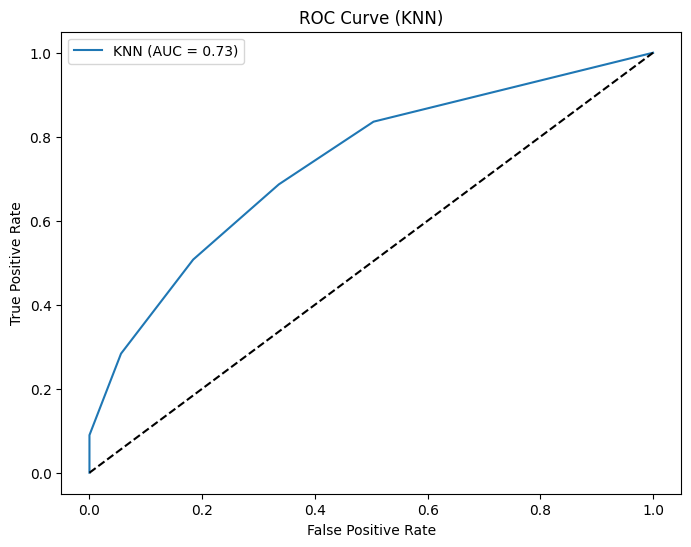

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=5) # You can adjust n_neighbors
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:, 1])

print("Confusion Matrix (KNN):\n", conf_matrix_knn)
print("Precision (KNN):", precision_knn)
print("Recall (KNN):", recall_knn)
print("F1-score (KNN):", f1_knn)
print("ROC AUC (KNN):", roc_auc_knn)

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (KNN)')
plt.legend()
plt.show()

### Decision Tree Model
Let's train a Decision Tree model and evaluate its performance.

Confusion Matrix (Decision Tree):
 [[107  18]
 [ 32  35]]
Precision (Decision Tree): 0.660377358490566
Recall (Decision Tree): 0.5223880597014925
F1-score (Decision Tree): 0.5833333333333334
ROC AUC (Decision Tree): 0.6891940298507462


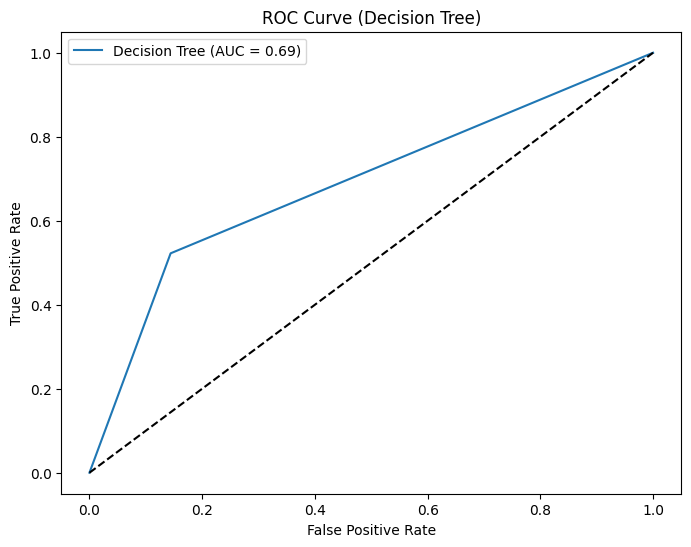

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_scaled, y_train)

y_pred_dtree = dtree.predict(X_test_scaled)

conf_matrix_dtree = confusion_matrix(y_test, y_pred_dtree)
precision_dtree = precision_score(y_test, y_pred_dtree)
recall_dtree = recall_score(y_test, y_pred_dtree)
f1_dtree = f1_score(y_test, y_pred_dtree)
roc_auc_dtree = roc_auc_score(y_test, dtree.predict_proba(X_test_scaled)[:, 1])

print("Confusion Matrix (Decision Tree):\n", conf_matrix_dtree)
print("Precision (Decision Tree):", precision_dtree)
print("Recall (Decision Tree):", recall_dtree)
print("F1-score (Decision Tree):", f1_dtree)
print("ROC AUC (Decision Tree):", roc_auc_dtree)

fpr_dtree, tpr_dtree, thresholds_dtree = roc_curve(y_test, dtree.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_dtree, tpr_dtree, label=f'Decision Tree (AUC = {roc_auc_dtree:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Decision Tree)')
plt.legend()
plt.show()

### Comparing Model Performance
Let's compare the performance of the trained models using the calculated metrics.

In [ ]:
import pandas as pd

metrics_data = {
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree'],
    'Accuracy': [logreg.score(X_test_scaled, y_test), knn.score(X_test_scaled, y_test), dtree.score(X_test_scaled, y_test)],
    'Precision': [precision_logreg, precision_knn, precision_dtree],
    'Recall': [recall_logreg, recall_knn, recall_dtree],
    'F1-score': [f1_logreg, f1_knn, f1_dtree],
    'ROC AUC': [roc_auc_logreg, roc_auc_knn, roc_auc_dtree]
}

performance_df = pd.DataFrame(metrics_data)

display(performance_df)
print("Confusion Matrix (Logistic Regression):\n", conf_matrix_logreg)
print("\nConfusion Matrix (KNN):\n", conf_matrix_knn)
print("\nConfusion Matrix (Decision Tree):\n", conf_matrix_dtree)

,Model,Accuracy,Precision,Recall,F1-score,ROC AUC
0,Logistic Regression,0.734375,0.648148,0.522388,0.578512,0.832000
1,KNN,0.708333,0.596491,0.507463,0.548387,0.734985
2,Decision Tree,0.739583,0.660377,0.522388,0.583333,0.689194


Confusion Matrix (Logistic Regression):
 [[106  19]
 [ 32  35]]

Confusion Matrix (KNN):
 [[102  23]
 [ 33  34]]

Confusion Matrix (Decision Tree):
 [[107  18]
 [ 32  35]]


In a medical context like diabetes screening, having high recall is crucial because we want to minimize the number of false negatives (people who have diabetes but are predicted as not having it). Missing a diabetes diagnosis can have serious consequences for a patient's health in long term.